<a href="https://colab.research.google.com/github/mrezaadi/DQLAB-Note/blob/main/Google%20Colab/DQLAB_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALISASI DATA**
1. Perbandingan/Komparasi

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

2. Distribusi

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

3. Komposisi

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

4. Keterhubungan/Relasi

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())
dataset

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id  ...    brand quantity item_price
0   1703458  2019-10-17        14004  ...  BRAND_J       10     740000
1   1706815  2019-10-24        17220  ...  BRAND_R        2     604000
2   1710718  2019-11-03        16518  ...  BRAND_C        8    1045000
3   1683592  2019-08-19        16364  ...  BRAND_A        4     205000
4   1702573  2019-10-16        15696  ...  BRAND_R        2    4475000

[5 rows x 9 columns]


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


**LIBRARY DATETIME**

Ada beberapa function yang berperan
1. apply & lambda biasa digunakan untuk membuat kolom baru, 
berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) 
berarti setiap input x di dalam kolom, akan diubah menjadi x*2). 
Dalam hal ini kolom yang sudah ada adalah dataset['order_date'], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja

2. Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.

3. Function  strftime digunakan untuk mengubah format suatu data bertime datetime, 
dalam hal ini diubah menjadi '%Y-%m', yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 

In [ ]:
#Membuat GMV demgan menggunakan library datetime

#Membuat kolom month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

#Membuat kolom gmv dengn cara mengkalikan item price dengan quanitity
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n'% dataset.shape)
print('Lima data teratas:')
dataset.head()

   order_id  order_date  customer_id  ... item_price order_month      gmv
0   1703458  2019-10-17        14004  ...     740000     2019-10  7400000
1   1706815  2019-10-24        17220  ...     604000     2019-10  1208000
2   1710718  2019-11-03        16518  ...    1045000     2019-11  8360000
3   1683592  2019-08-19        16364  ...     205000     2019-08   820000
4   1702573  2019-10-16        15696  ...    4475000     2019-10  8950000

[5 rows x 11 columns]
Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


**MEMBUAT AGREGAT**

In [ ]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


**MATPLOTLIB**

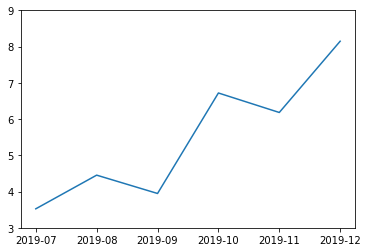

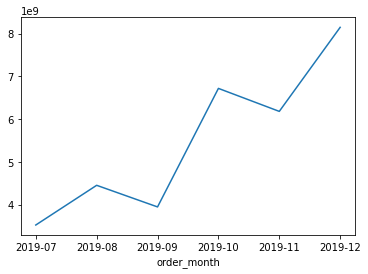

In [ ]:
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))

plt.show()
#Cara pendekatan lain
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

**FIGURE MATPLOTLIB**

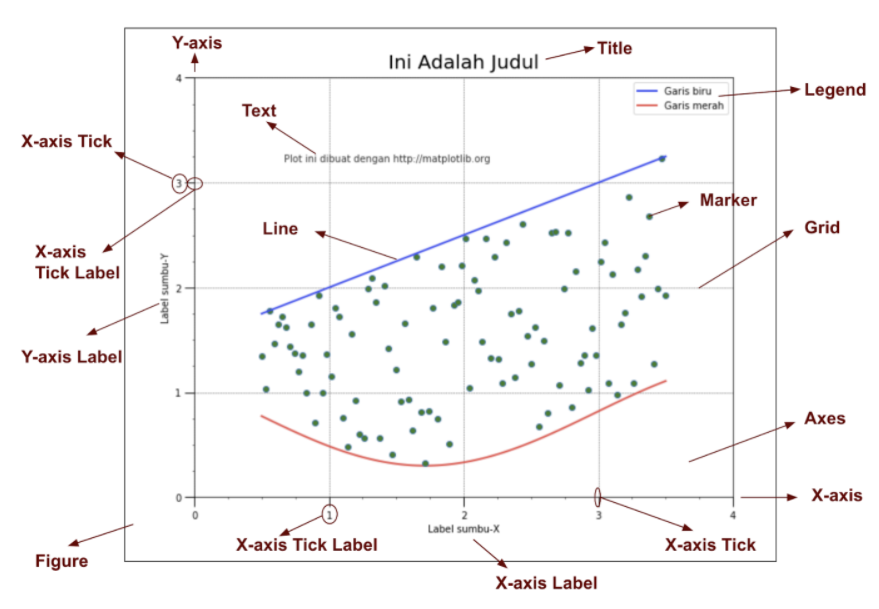

* Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.
* Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. 
* Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). * Masing-masing sumbu memiliki komponen sebagai berikut:
 * Axis Label: Nama dari sumbu yang ditampilkan.
 * Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
 * Tick Label: Tulisan di tiap tick yang menyatakan nilainya.
* Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).
* Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.




**KUSTOMISASI TITTLE DAN AXIS LABEL**
* loc: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.
* pad: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
* fontsize: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).
* color: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.

**KUSTOMISASI LINE DAN POINT**
* color: mengubah warnanya (sama seperti di title)
* linewidth: mengubah ketebalan line/garisnya (dalam satuan px)
* linestyle: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.
* marker: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.


**KUSTOMISASI LEGEND**
* loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
 * 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
 * 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
  * 'center': legend diletakkan di tengah-tengah axes
  * 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
* bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
* shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
* ncol: jumlah kolom dari isi legend, defaultnya adalah 1
* fontsize: ukuran huruf pada legend
* title: memberikan judul pada legend
* title_fontsize: ukuran huruf pada judul legend

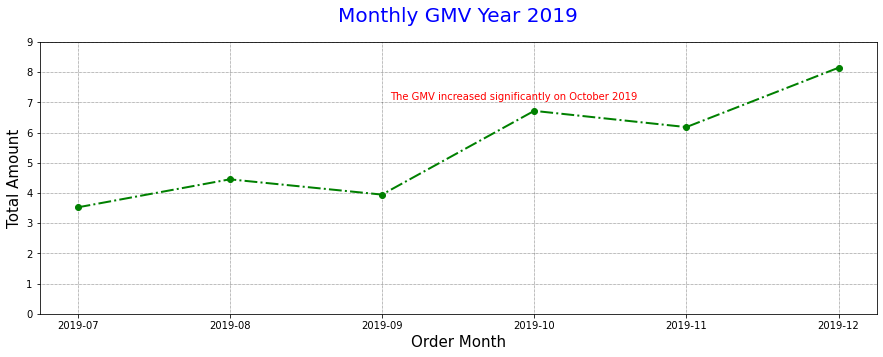

order_month
2019-07    3524041000
2019-08    4452923000
2019-09    3947002000
2019-10    6719937000
2019-11    6182229000
2019-12    8148235000
Name: gmv, dtype: int64

In [ ]:
#Saran ubah fgsize terlebih dahulu agar komponen lain tidak berubah
fig = plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center',pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='black', linestyle=':', linewidth=0.5) #Kustomisasi Grid
plt.ylim(ymin=0) #Batas minimun Axis Ticks
labels, locations = plt.yticks() #Untuk ubah labels pada axis y
plt.yticks(labels, (labels/1000000000).astype(int)) #Kustomisasi Axis Ticks, nilai awal labels dibagi dengan 1 miliyar. 
#Agar figure lebih rapih, jika tidak figure diatas akan ada tulisan le9
#Atau dengan kata lain normalisasi
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform= fig.transFigure, color='red') #Menambahkah informasi pada plot
plt.savefig('monthly_gmv.png', quality=95) #Menyimpan gambar dengan kulitas 95% dari aslinya
plt.show()
dataset.groupby(['order_month'])['gmv'].sum()

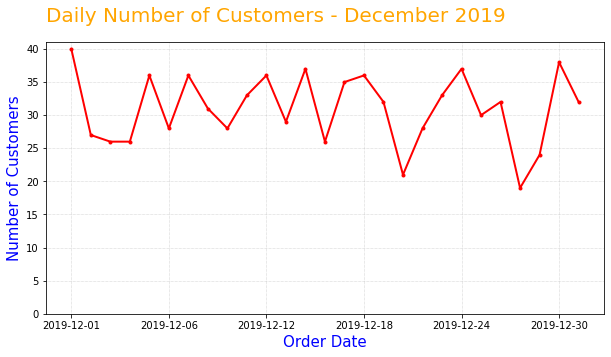

order_date
2019-12-01    40
2019-12-02    27
2019-12-03    26
2019-12-04    26
2019-12-05    36
2019-12-06    28
2019-12-08    36
2019-12-09    31
2019-12-10    28
2019-12-11    33
2019-12-12    36
2019-12-13    29
2019-12-15    37
2019-12-16    26
2019-12-17    35
2019-12-18    36
2019-12-19    32
2019-12-20    21
2019-12-22    28
2019-12-23    33
2019-12-24    37
2019-12-25    30
2019-12-26    32
2019-12-27    19
2019-12-29    24
2019-12-30    38
2019-12-31    32
Name: customer_id, dtype: int64

In [ ]:
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique()

**MEMBUAT MULTI LINE CHART**

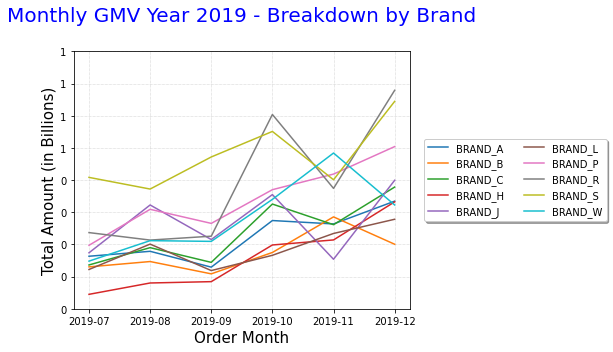

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
order_month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


In [ ]:
# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize= 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(10,5) #plt.gcf untuk mendapatkan current figure. Set size untuk menentukan ukuran figure
plt.tight_layout() #Otomatis akan meletakan parameter diluar figure, biasanya jika tidak parameter akan menyatu denga figure
plt.show()
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack()

<Figure size 432x288 with 0 Axes>

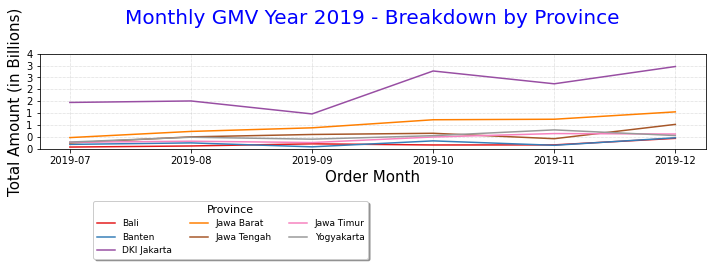

province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_month,,,,,,,
2019-07,79480000,191513000,1951871000,476533000,252429000,282076000,290139000
2019-08,125025000,254130000,2014393000,735536000,507441000,324629000,491769000
2019-09,214442000,89088000,1469887000,886835000,607802000,268764000,410184000
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


In [ ]:
plt.clf() #Clear current figure
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='best', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack() #Unstack untuk mengatur pivot table

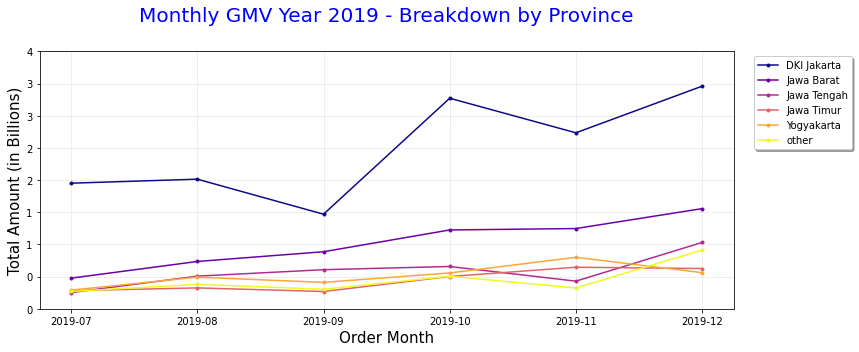

,province,gmv
2,DKI Jakarta,14902763000
3,Jawa Barat,6128149000
4,Jawa Tengah,3485884000
6,Yogyakarta,3111241000
5,Jawa Timur,2649486000


In [ ]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
.sum()
.reset_index()
.sort_values(by='gmv',ascending=False)
.head(5))
top_provinces

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()
top_provinces

**MEMBUAT ANOTASI**

Gunakann plt.annotate(parameter)
* xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
* arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
  * arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
  * connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
 * color: menentukan warna dari panah

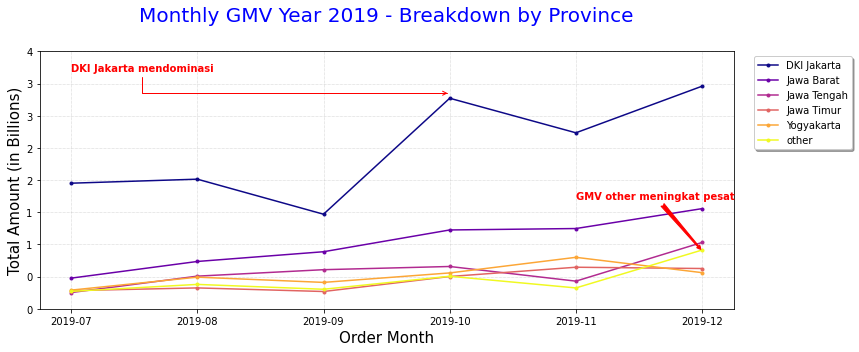

In [ ]:
#Line chart dengan anotate, dengan data dikelompokkan berdasarkan 5 provinsi dengan gmv tertinggi. Provinsi yang lain masuk kategori other
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5,900000000), 
			 xytext=(4,1700000000), weight='bold',color='red', 
			 arrowprops=dict(arrowstyle='fancy',
							connectionstyle="arc3", 
							color='red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3,3350000000), 
			 xytext=(0,3700000000), weight='bold',color='red', 
			 arrowprops=dict(arrowstyle='->',
							connectionstyle="angle", 
							color='red'))
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

**MEMBUAT BARCHART DAN PIECHART**

In [ ]:
#Membuat subset
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')] #Membuat subset dengan data untuk Provinsi Jakarta di Q4
dataset_dki_q4.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv,province_top
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000,DKI Jakarta
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000,DKI Jakarta
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000,DKI Jakarta
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000,DKI Jakarta
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11,1465000,DKI Jakarta


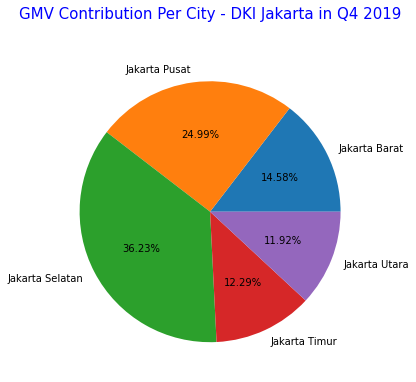

In [ ]:
#Membuat pie chart
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index() #Fungsi agregasi, untuk mendapatkan jumlah gmv per kota
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'],labels= gmv_per_city_dki_q4['city'], autopct= '%1.2f%%') #Autro persentase
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30,fontsize=15, color='blue')
plt.show()

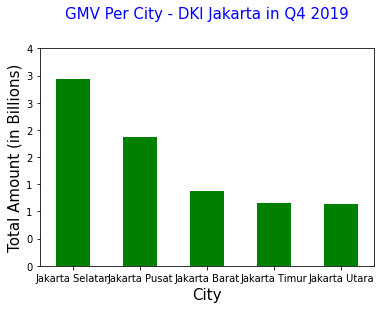

In [ ]:
#Membuat barchart
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

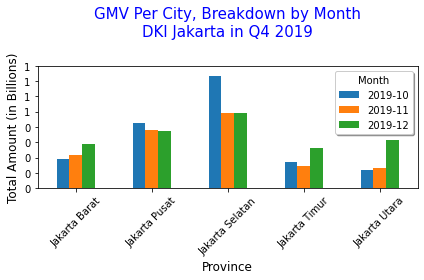

In [ ]:
#Membuat multi barchart
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

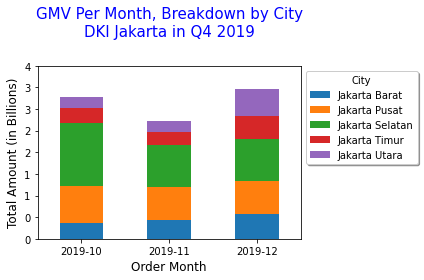

In [ ]:
#Stacked Chart
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**MEMBUAT HISTOGRAM DAN SCATTER PLOT**

Gunakan plt.hist()
* bins: jumlah bin (kelompok nilai) yang diinginkan
* range: nilai minimum dan maksimum yang ditampilkan
* orientation: ‘horizontal’ atau ‘vertikal’
* color: warna bar di histogram

In [ ]:
#Membuat subset baru
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                                   .agg({'order_id':'nunique', 
                                         'quantity': 'sum', 
                                         'gmv':'sum'})
                                   .reset_index()
                                   .rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


<Figure size 432x288 with 0 Axes>

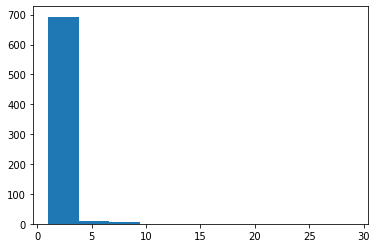

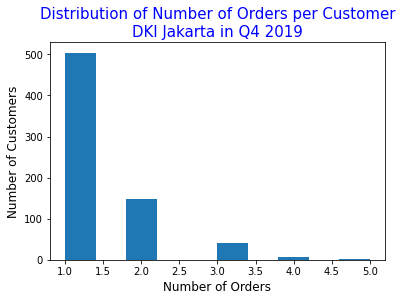

In [ ]:
#Membuat histogram 1
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()

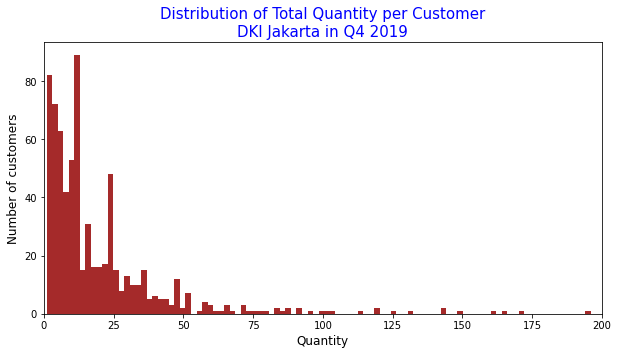

In [ ]:
#Membuat histogram 2
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

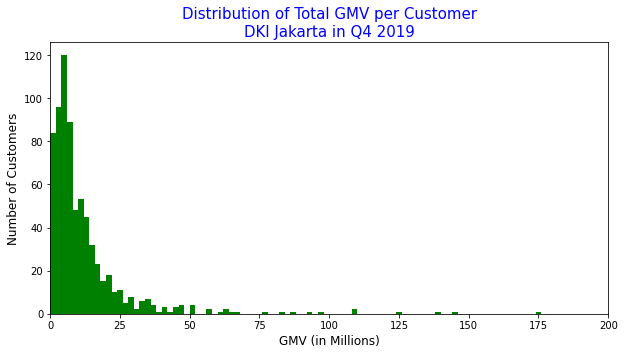

In [ ]:
#Membuat histogram 3
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

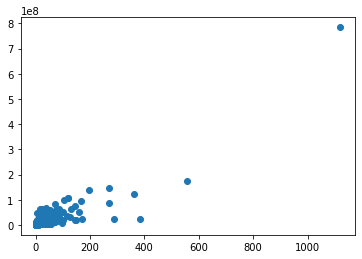

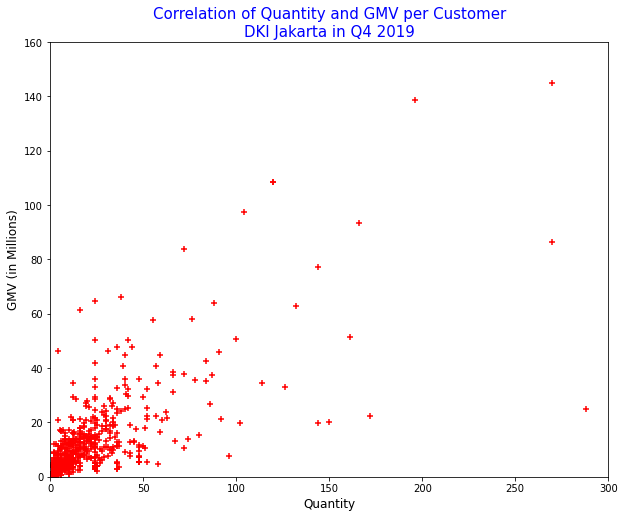

In [ ]:
#Membuat Scatter Plot
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+',color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize = 12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

**MINI PROJECT**

In [ ]:
'''
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, 
hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. 
Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.
'''
#mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))

#membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
top_brands

,brand,quantity
8,BRAND_S,2197
6,BRAND_P,2194
7,BRAND_R,1508
2,BRAND_C,1365
0,BRAND_A,1315


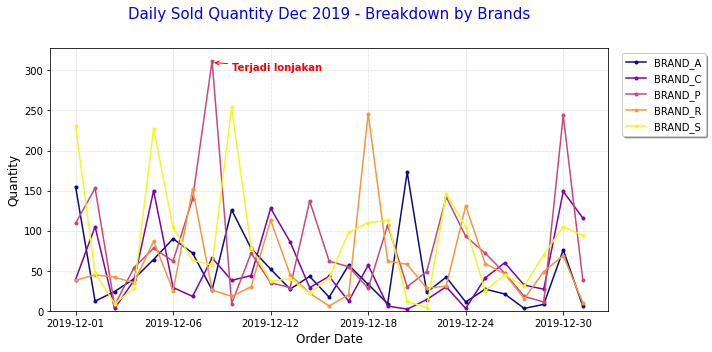

In [ ]:
'''
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. 
Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). 
Beri anotasi untuk titik lonjakan tersebut.
'''
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

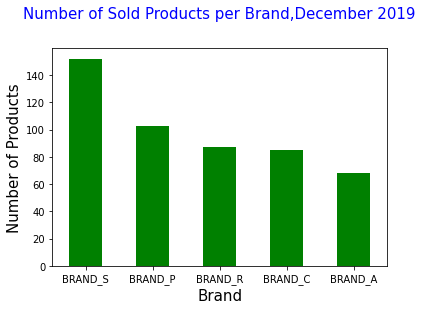

In [ ]:
'''
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. 
Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.
'''
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand,December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

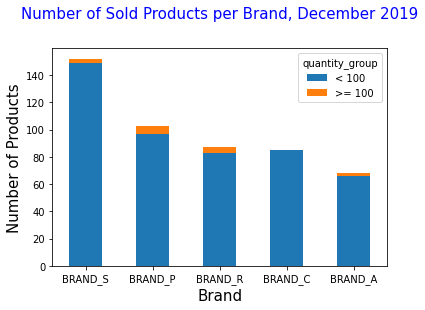

In [ ]:
'''

'''
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['product_id','brand'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x >= 100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

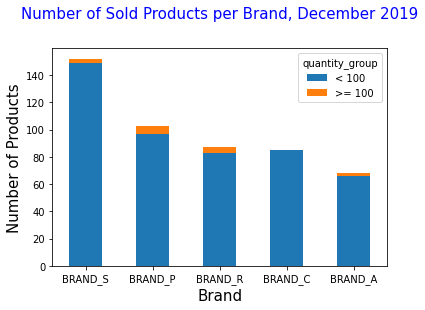

In [ ]:
import matplotlib.pyplot as plt
#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

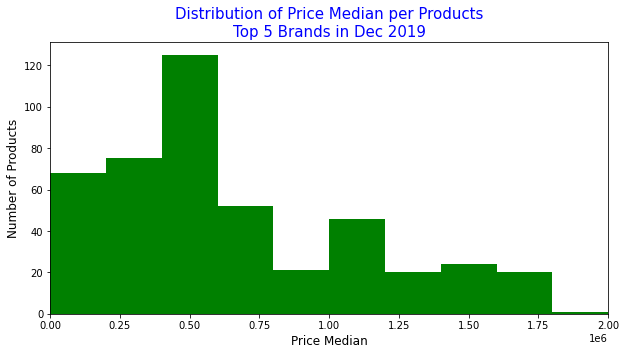

In [ ]:
'''
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap product_id, ambil median harganya). 
Bagaimana persebaran harga product nya? Cenderung banyak yang murah atau yang mahal?
'''
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=False, range=(1,2000000), color='green')
plt.title('Distribution of Price Median per Products\nTop 5 Brands in Dec 2019',fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.show()

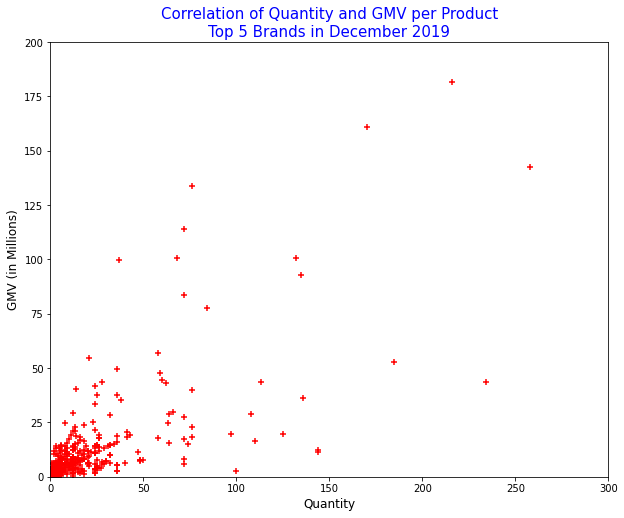

In [ ]:
'''
Untuk setiap product_id, cek scatterplot antara  quantity dan GMV, apakah ada korelasi? 
Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?
'''
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 432x288 with 0 Axes>

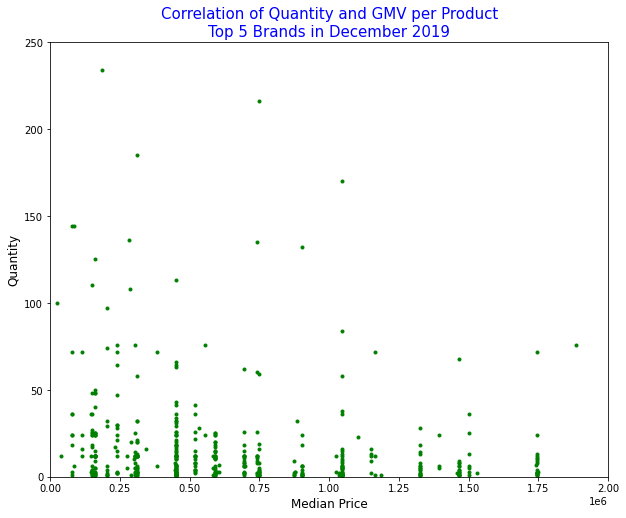

In [ ]:
plt.clf()
#agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()

#scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='.', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',fontsize=15, color='blue')
plt.xlabel('Median Price', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)
plt.show()

**PROJECT**

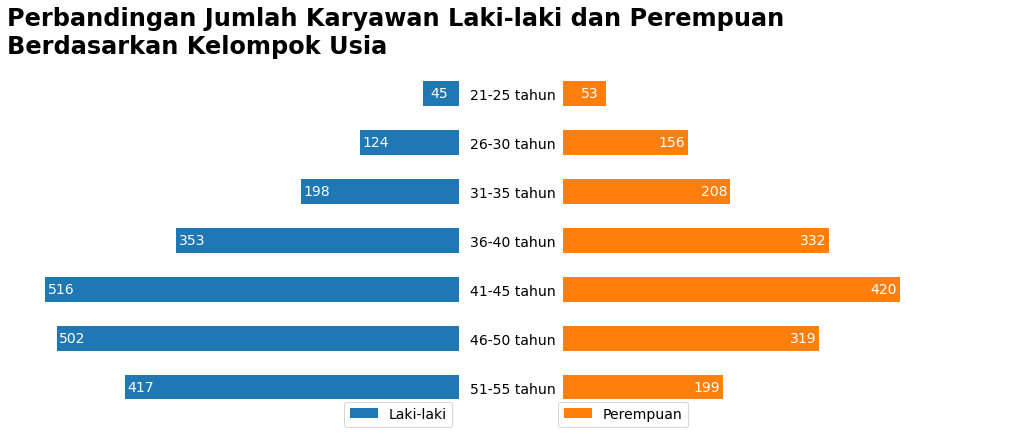

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = (pd.read_csv("https://storage.googleapis.com/dqlab-dataset/usia_karyawan.csv")
.sort_values("Kelompok Usia", ascending=False)
.set_index("Kelompok Usia")
)

tabel["Laki-laki"] = -tabel["Laki-laki"]
fig, axes = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle("Perbandingan Jumlah Karyawan Laki-laki dan Perempuan\nBerdasarkan Kelompok Usia", x=0., y=1.0, fontsize=24, fontweight="bold", ha="left")
tabel["Laki-laki"].plot(kind="barh", ax=axes[0], color="tab:blue", xlim=[-550,0])
tabel["Perempuan"].plot(kind="barh", ax=axes[1], color="tab:orange", fontsize=14, xlim=[0,550])
axes[0].set_ylabel("")
axes[0].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
axes[0].legend(["Laki-laki"], fontsize=14, bbox_to_anchor=(0., 0., 1., .05))
axes[0].set_frame_on(False)
axes[1].set_ylabel("")
axes[1].tick_params(left=False, bottom=False, labelbottom=False)
axes[1].legend(["Perempuan"], fontsize=14, bbox_to_anchor=(0., 0., 0.3, .05))
axes[1].set_frame_on(False)
for i, m, w in zip(range(tabel.shape[0]), list(tabel['Laki-laki']), list(tabel['Perempuan'])):
	axes[0].annotate(str(abs(m)), (m+20, i), xytext=(m+20,i),
					color="w", va="center", ha="center", fontsize=14)
	axes[1].annotate(str(abs(w)), (w-20, i), xytext=(w-20,i), 
					 color="w", va="center", ha="center", fontsize=14)
plt.tight_layout(rect=(0,0,1,0.88))
plt.show()

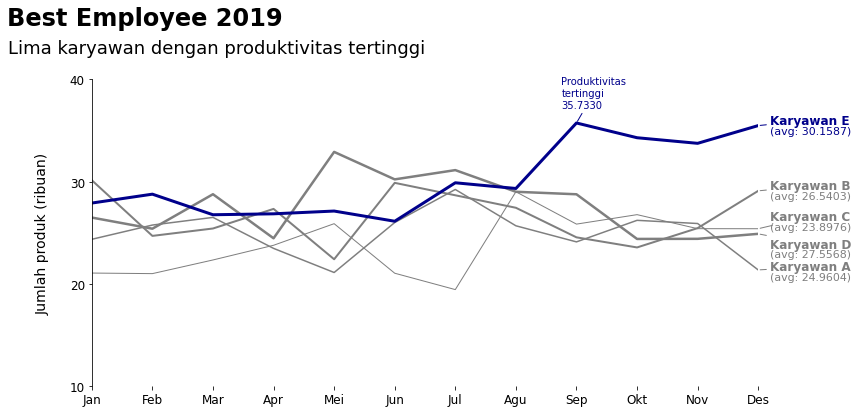

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

tabel = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/produktivitas_karyawan.csv", index_col="Bulan") / 1000

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Best Employee 2019", x=0.01, y=0.95, fontsize=24, fontweight='bold', ha="left")
ax.set_title("Lima karyawan dengan produktivitas tertinggi\n", fontsize=18, ha="right")

colors = ["tab:gray", "tab:gray", "tab:gray", "tab:gray", "darkblue"]
line_widths = [ 1.5, 2, 1, 2.5, 3.]
lp = tabel.plot(kind="line", ax=ax, xlim=[0, 11], ylim=[10, 40], color=colors,
xticks=range(tabel.shape[0]), yticks=[10, 20, 30, 40])

add_lbl_pos = [ 0.3, 0.5, 1.2, -1.0, 0.5]
add_avg_pos = [-0.7, -0.5, 0.2, -2.0, -0.5]
for i, item in enumerate(lp.get_lines()):
  item.set_linewidth(line_widths[i])
  lbl = item.get_label()
  ax.annotate(lbl, (11, tabel.loc["Desember", lbl]),
    (11.2, tabel.loc["Desember", lbl] + add_lbl_pos[i]),
    fontweight="bold", fontsize=12, color=colors[i], va="center",
    arrowprops={"arrowstyle": "-", "color": colors[i]})
  ax.annotate("(avg: %.4f)" % tabel[lbl].mean(), (11, tabel.loc["Desember", lbl]),
    (11.2, tabel.loc["Desember", lbl] + add_avg_pos[i]),
    fontsize=11, color=colors[i], va="center")
highest_prod = tabel["Karyawan E"].max()
ax.annotate("Produktivitas\ntertinggi\n%.4f" % highest_prod,
(8, highest_prod), (7.75, highest_prod+1.5),
ha="left", color=colors[-1], arrowprops={"arrowstyle": "-", "color": colors[-1]})
ax.set_xticklabels([item[:3] for item in tabel.index], fontsize=12)
ax.set_yticklabels([str(i) for i in [10, 20, 30, 40]], fontsize=12)
ax.set_xlabel("")
ax.set_ylabel("Jumlah produk (ribuan)\n", fontsize=14)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.get_legend().remove()
plt.tight_layout(rect=(0,0,1,0.90))
plt.show()